In [1]:
using Revise
includet("src/MTH8404_projet.jl")

In [2]:
using .problems, 
    .all_at_once,
    .model
    
traj_target = drone_trajectories["no_disturbance_sample"]
stats = all_at_once_ipopt(traj_target)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1708
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      528

Total number of variables............................:      768
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equal

"Execution stats: first-order stationary"

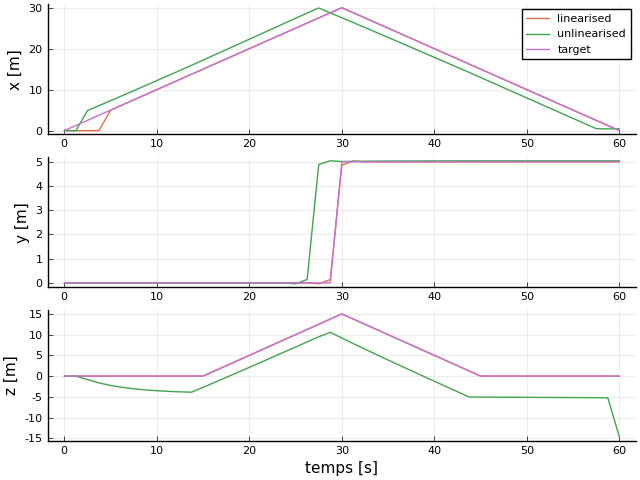

In [3]:
pyplot()
using .post_processing
traj_opt, traj_sim = sol_2_trajectory(stats, traj_target)

trajectories = Dict([("target", traj_target), ("linearised", traj_opt), ("unlinearised", traj_sim)])
plt_pos = plot_trajectory(trajectories)

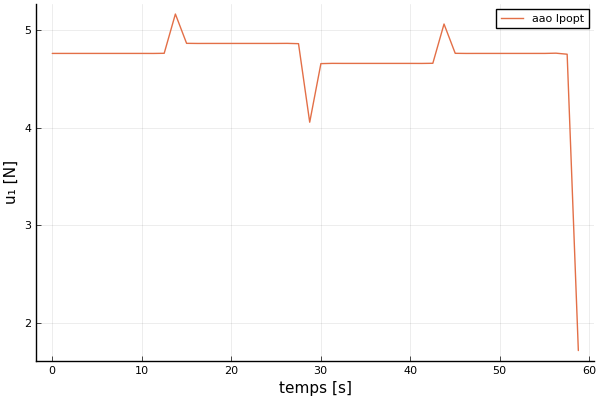

In [4]:
plt_u1 = plot_u1(Dict([("aao Ipopt",stats)]))

linearised -> 4.682282186064708
unlinearised -> 38.036004795250285
target -> 0.0


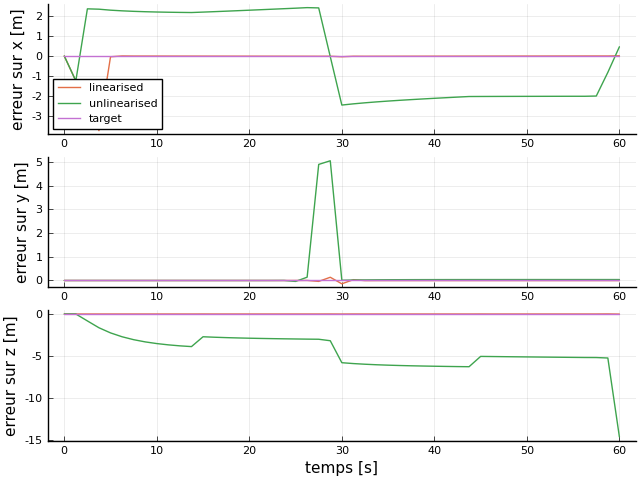

In [10]:
plt_error, dict_error = solve_L2_error(trajectories, traj_target)
for (name, L2) in dict_error
    println(name, " -> ", L2)
end
plt_error